# Decision Trees and Random Forests

Decision Trees:

* Decision Trees are a type of supervised machine learning algorithm used for both classification and regression tasks.
* They work by recursively splitting the data into subsets based on the most significant features.
* At each node of the tree, a decision is made by evaluating a feature's value.
The goal is to create a tree structure that best separates or predicts the target variable.
* Decision Trees can be prone to overfitting, but they are interpretable and can serve as the basis for more advanced ensemble methods.
Random Forests:

* Random Forests are an ensemble learning method based on Decision Trees.
They create multiple Decision Trees during training, each with a random subset of the data and features.
* When making predictions, the results from multiple trees are combined (e.g., voting for classification or averaging for regression).
* Random Forests improve the robustness and generalization of the model and reduce the risk of overfitting.
* They are widely used for classification and regression tasks and are known for their accuracy and versatility.

![i](https://github.com/mitramir55/teaching_material/blob/master/Trees%20and%20SVM/istockphoto-528342475-612x612.jpg?raw=true)

In [1]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:

# Load the House Prices dataset
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

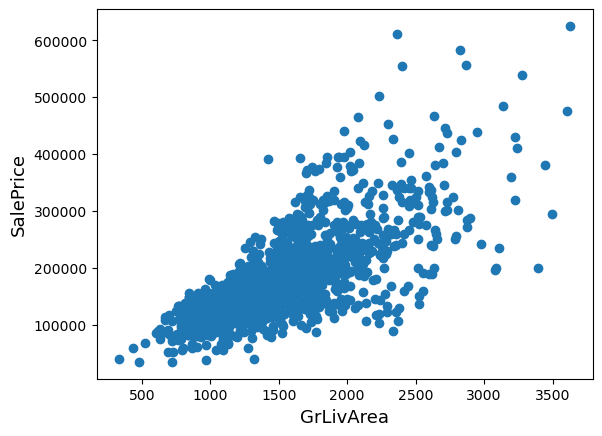

In [21]:
# Delete the outliers -> df['GrLivArea']>4000
mask = df['GrLivArea']<4000
df_sample = df[mask]

# plot it again
fig, ax = plt.subplots()
ax.scatter(df_sample['GrLivArea'], df_sample['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [22]:
# filter the dataset based on the following columns
columns_to_use = ['LotArea', 'YrSold', 'GarageArea', 'GarageYrBlt',
                  'GrLivArea', 'OverallQual', 'MasVnrArea', 'YearBuilt',
                  'MSZoning', 'Neighborhood', 'KitchenQual',
                  'SalePrice']

# save the new dataset into df_sample
df_sample = df_sample.loc[:, columns_to_use]

In [23]:
df_sample

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,MasVnrArea,YearBuilt,MSZoning,Neighborhood,KitchenQual,SalePrice
0,8450,2008,548,2003.0,1710,7,196.0,2003,RL,CollgCr,Gd,208500
1,9600,2007,460,1976.0,1262,6,0.0,1976,RL,Veenker,TA,181500
2,11250,2008,608,2001.0,1786,7,162.0,2001,RL,CollgCr,Gd,223500
3,9550,2006,642,1998.0,1717,7,0.0,1915,RL,Crawfor,Gd,140000
4,14260,2008,836,2000.0,2198,8,350.0,2000,RL,NoRidge,Gd,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,0.0,1999,RL,Gilbert,TA,175000
1456,13175,2010,500,1978.0,2073,6,119.0,1978,RL,NWAmes,TA,210000
1457,9042,2010,252,1941.0,2340,7,0.0,1941,RL,Crawfor,Gd,266500
1458,9717,2010,240,1950.0,1078,5,0.0,1950,RL,NAmes,Gd,142125


In [28]:
# look into the number of nulls we have
# (sort the values to have the emptiest column on top)
nulls = df_sample.isnull().sum().sort_values(ascending=False)
nulls

GarageYrBlt     81
MasVnrArea       8
LotArea          0
YrSold           0
GarageArea       0
GrLivArea        0
OverallQual      0
YearBuilt        0
MSZoning         0
Neighborhood     0
KitchenQual      0
SalePrice        0
dtype: int64

In [30]:
# fillna with mean for: GarageYrBlt, MasVnrArea
garage_yr_built_mean = df_sample["GarageYrBlt"].mean()
mas_vnr_area = df_sample["MasVnrArea"].mean()

df_sample["GarageYrBlt"] = df_sample["GarageYrBlt"].fillna(garage_yr_built_mean)
df_sample["MasVnrArea"] = df_sample["MasVnrArea"].fillna(mas_vnr_area)

In [31]:
# look into the number of nulls we have
# (sort the values to have the emptiest column on top)
nulls = df_sample.isnull().sum().sort_values(ascending=False)
nulls

LotArea         0
YrSold          0
GarageArea      0
GarageYrBlt     0
GrLivArea       0
OverallQual     0
MasVnrArea      0
YearBuilt       0
MSZoning        0
Neighborhood    0
KitchenQual     0
SalePrice       0
dtype: int64

In [34]:

# create a second dataset from the first dataset
df_transformed = df_sample.copy()

# use ordinal encoder to transform kitchen quality (KitchenQual)
from sklearn.preprocessing import OrdinalEncoder

order = ['Fa','TA','Gd','Ex']
ord_en = OrdinalEncoder(categories = [order])

# transform this column
df_transformed['KitchenQual'] = ord_en.fit_transform(df_transformed[['KitchenQual']])
# df_transformed.drop(columns=['KitchenQual'], inplace=True)

# Specify the columns to be one-hot encoded
columns_to_encode = ['Neighborhood', 'MSZoning']

# Perform one-hot encoding with get_dummies
encoded_df = pd.get_dummies(df_transformed, columns=columns_to_encode)
encoded_df

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,MasVnrArea,YearBuilt,KitchenQual,SalePrice,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,8450,2008,548,2003.0,1710,7,196.0,2003,2.0,208500,...,False,False,False,False,False,False,False,False,True,False
1,9600,2007,460,1976.0,1262,6,0.0,1976,1.0,181500,...,False,False,False,False,True,False,False,False,True,False
2,11250,2008,608,2001.0,1786,7,162.0,2001,2.0,223500,...,False,False,False,False,False,False,False,False,True,False
3,9550,2006,642,1998.0,1717,7,0.0,1915,2.0,140000,...,False,False,False,False,False,False,False,False,True,False
4,14260,2008,836,2000.0,2198,8,350.0,2000,2.0,250000,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,0.0,1999,1.0,175000,...,False,False,False,False,False,False,False,False,True,False
1456,13175,2010,500,1978.0,2073,6,119.0,1978,1.0,210000,...,False,False,False,False,False,False,False,False,True,False
1457,9042,2010,252,1941.0,2340,7,0.0,1941,2.0,266500,...,False,False,False,False,False,False,False,False,True,False
1458,9717,2010,240,1950.0,1078,5,0.0,1950,2.0,142125,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# view the columns to make sure we don't have duplicates
...

In [ ]:
# view data types
encoded_df.dtypes

In [ ]:
# create the X and Y based on having and not having the SalePrice column
X = ...
y = ...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [ ]:
y_train

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree model
decision_tree = ...

# Fit the model to the training data
...


In [ ]:
from sklearn.tree import plot_tree

# plot the tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True, feature_names=X.columns)
plt.show()


In [ ]:
# change max_depth to see only the first few features
# plot the tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, max_depth=5, fontsize=5)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model
random_forest = ...

# Fit the model to the training data
...


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Decision Tree performance
y_pred_decision_tree = ...
mae_decision_tree = ...
r2_decision_tree = ...

# Random Forest performance
y_pred_random_forest = ...
mae_random_forest = ...
r2_random_forest = ...

print("Decision Tree MAE:", mae_decision_tree)
print("Decision Tree R-squared:", r2_decision_tree)
print("Random Forest MAE:", mae_random_forest)
print("Random Forest R-squared:", r2_random_forest)


In [ ]:
# Create a Random Forest model with a different number of trees (higher than 150)
random_forest_new = ...
random_forest_new.fit(X_train, y_train)

# Evaluate the new Random Forest model
y_pred_random_forest_new = ...
mae_random_forest_new = ...
r2_random_forest_new = ...

print("Random Forest (New) MAE:", mae_random_forest_new)
print("Random Forest (New) R-squared:", r2_random_forest_new)


In [ ]:
import numpy as np

# Vary the number of trees in the Random Forest
n_estimators_range = [50, 100, 150, 200]
mae_scores = []
r2_scores = []

for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred_rf = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_rf)
    r2 = r2_score(y_test, y_pred_rf)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, mae_scores, marker='o')
plt.title('MAE vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Absolute Error')

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, r2_scores, marker='o')
plt.title('R-squared vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('R-squared Score')

plt.tight_layout()
plt.show()


### SVR (Optional)

Support Vector Machines (SVM) is a machine learning algorithm that can be used for both classification and regression tasks. Support Vector Classification (SVC) and Support Vector Regression (SVR) are two variants of SVM that are specifically tailored for different types of machine learning problems.



In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# scale the X_train before fitting the algorithm to it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# create svr with kernel='rbf', C=1.0, epsilon=0.1
svr = ...

# fit it to the scaled X
...

# svr prediction
y_pred_svr = ...

In [ ]:
# get the measurements for evaluation
mae = mean_absolute_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


In [ ]:
# how to improve the results?

In [ ]:
from sklearn.model_selection import GridSearchCV


# Define a grid of hyperparameters to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(SVR(), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Get the best SVR model from the grid search
best_svr = grid_search.best_estimator_

# Make predictions on the test set
y_pred_svr = best_svr.predict(X_test_scaled)

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_svr)
print("Mean Absolute Error (MAE):", mae)

# Calculate and print the R-squared (R2) score
r2 = r2_score(y_test, y_pred_svr)
print("R-squared (R2) Score:", r2)

# Print the best kernel and hyperparameters
print("Best Kernel:", best_svr.kernel)
print("Best C:", best_svr.C)
print("Best Gamma:", best_svr.gamma)


In [ ]:
import matplotlib.pyplot as plt

# Plotting the real values (y_test) against the SVR predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, label='SVR', marker='o', color='blue', alpha=0.7)

# Adding Random Forest predictions
plt.scatter(y_test, y_pred_decision_tree, label='Decision Tree', marker='x', color='red', alpha=0.7)

# Adding Random Forest (New) predictions
plt.scatter(y_test, y_pred_random_forest, label='Random Forest', marker='s', color='green', alpha=0.7)

# Plotting the perfect prediction line (y_test = y_test)
plt.plot(y_test, y_test, 'k--', label='Perfect Prediction')

# Adding labels and legend
plt.xlabel("Real Values (y_test)")
plt.ylabel("Predicted Values")
plt.title("Comparison of Predicted Values vs. Real Values")
plt.legend()
plt.grid()

# Display the plot
plt.show()


References

* https://www.google.com/search?q=decision+tree+algorithm&sca_esv=572530057&biw=1536&bih=707&tbm=vid&sxsrf=AM9HkKn2OLtD25h_k9-65mPCVRoOifFNZA%3A1697030869036&ei=1aImZZLpAeyF0PEP3fitgAI&oq=dec&gs_lp=Eg1nd3Mtd2l6LXZpZGVvIgNkZWMqAggAMggQABiKBRiRAjIHEAAYigUYQzIIEAAYigUYkQIyBxAAGIoFGEMyBRAAGIAEMgUQABiABDIFEAAYgAQyBRAAGIAEMggQABiABBixAzIFEAAYgARIhxRQhgZY4AlwAXgAkAEAmAGJAaAB7AOqAQMzLjK4AQPIAQD4AQHCAgQQIxgnwgIGEAAYFhgewgIIEAAYigUYhgPCAgsQABiKBRixAxiDAcICCxAAGIAEGLEDGIMBiAYB&sclient=gws-wiz-video#fpstate=ive&vld=cid:3863e517,vid:_L39rN6gz7Y,st:0


* https://www.youtube.com/watch?v=_L39rN6gz7Y&ab_channel=StatQuestwithJoshStarmer
* https://www.kaggle.com/code/vincentbrunner/ml-from-scratch-decision-trees